<a href="https://colab.research.google.com/github/anandkumarprajapati/EDA-Hotel-Booking-Analysis-/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
null_values= df.isnull().sum().sort_values(ascending=False)
null_values[null_values>0]

company     112593
agent        16340
country        488
children         4
dtype: int64

In [ ]:
df2=df.copy() 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df2.drop('company',inplace=True,axis=1)

In [ ]:
# filling children and agents columns with median values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(df2[['children','agent']])
df2[['children','agent']]=imputer.transform(df2[['children','agent']])

In [ ]:
null_values= df2.isnull().sum().sort_values(ascending=False)
null_values[null_values>0]

country    488
dtype: int64

In [ ]:
df2['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
BFA        1
KIR        1
PYF        1
SMR        1
FJI        1
Name: country, Length: 177, dtype: int64

In [ ]:
df2['country'].mode().values[0]

'PRT'

In [ ]:
df2['country'].fillna(str(df2['country'].mode().values[0]),inplace=True)

In [ ]:
null_values= df2.isnull().sum().sort_values(ascending=False)
null_values[null_values>0]

Series([], dtype: int64)

In [ ]:
def get_percentage(Column,limit=None):

    Column = Column.value_counts()[:limit]
    
    x = Column.index
    y = Column/Column.sum()*100
    
    return x.values,y.values

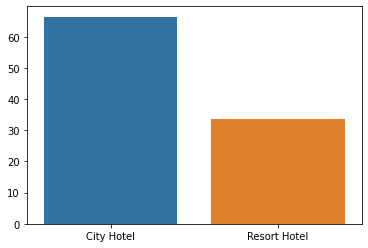

In [ ]:
# distribution percentage of hotel
values,percentage = get_percentage(df2['hotel'])
values,percentage
sns.barplot(x=values,y=percentage)

In [ ]:
# distribution percentage of cancellation 

values,percentage = get_percentage(df2['is_canceled'])
values,percentage

#is_canceled have two unique values: 1 if booking got canceled, else 0

(array([0, 1]), array([62.95837172, 37.04162828]))

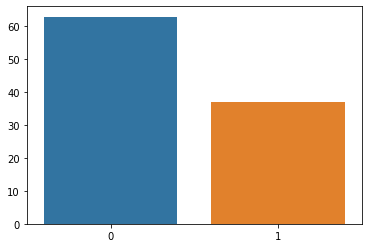

In [ ]:
sns.barplot(x=values,y=percentage)

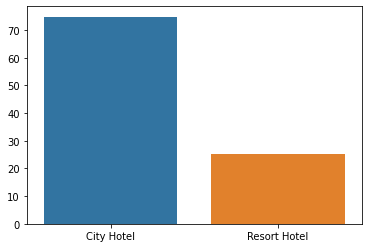

In [ ]:
# distribution percentage of hotel which saw cancellations 

df_not_canceled = df2[df2['is_canceled'] == 0]
df_is_canceled = df2[df2['is_canceled'] == 1]
series= df_is_canceled['hotel'].value_counts()

hotel_type = series.index
count_percent_cancellation = series.values/series.values.sum()*100

sns.barplot(x=hotel_type,y=count_percent_cancellation)

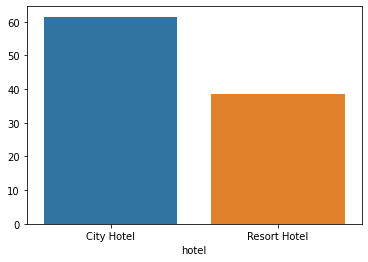

In [ ]:
#distribution of repeated guest hotel wise

series=df_not_canceled.groupby('hotel')["is_repeated_guest"].count()
hotel_type=series.index
count_percent_repeated_guest=series.values/series.values.sum()*100

sns.barplot(x=hotel_type,y=count_percent_repeated_guest)

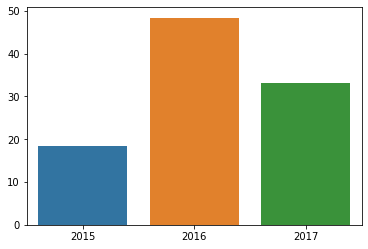

In [ ]:
#bookings that didnt get cancelled dataframe and how many bookings each year
df_not_canceled = df2[df2['is_canceled'] == 0]
values,percentage = get_percentage (df_not_canceled['arrival_date_year'])
sns.barplot(x=values,y=percentage)

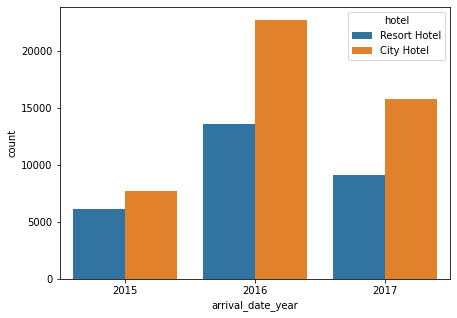

In [ ]:
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);

In [ ]:
df_not_canceled['arrival_date_month'].value_counts()

August       8638
July         7919
May          7114
October      6914
March        6645
April        6565
June         6404
September    6392
February     5372
November     4672
December     4409
January      4122
Name: arrival_date_month, dtype: int64

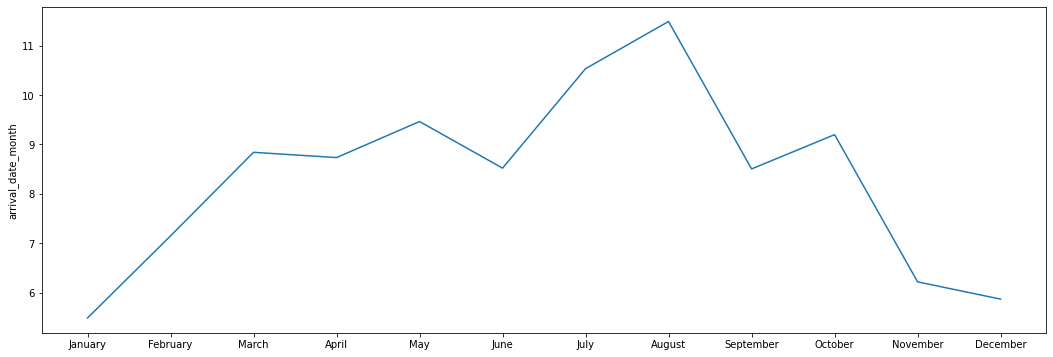

In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

different_months = sorted_months.index
montly_bookings_percentage = sorted_months/sorted_months.sum()*100


plt.subplots(figsize=(18,6))
sns.lineplot(x=different_months,y=montly_bookings_percentage)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


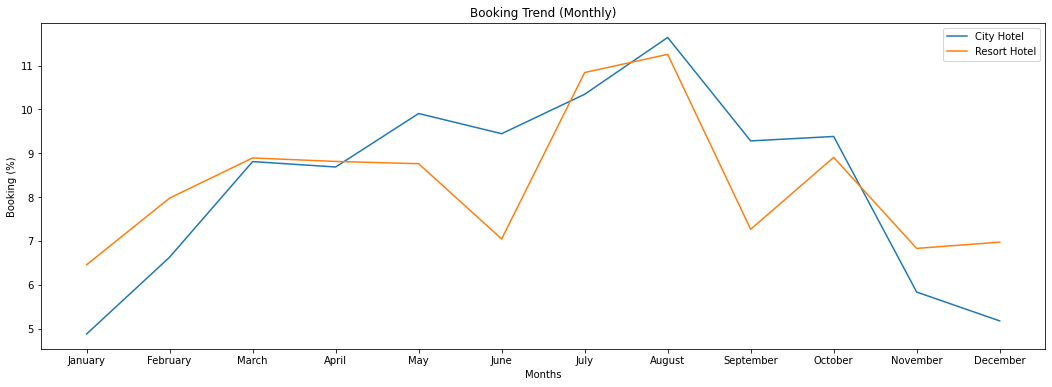

In [ ]:
## Select only City Hotel
sorted_months = df_not_canceled.loc[df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100

## Select only Resort Hotel
sorted_months = df_not_canceled.loc[df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100

## Draw the line plot

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')


sns.lineplot(x1, y1.values, label='City Hotel', sort=False)
sns.lineplot(x1, y2.values, label='Resort Hotel', sort=False)

plt.show()

Text(0, 0.5, 'Count')

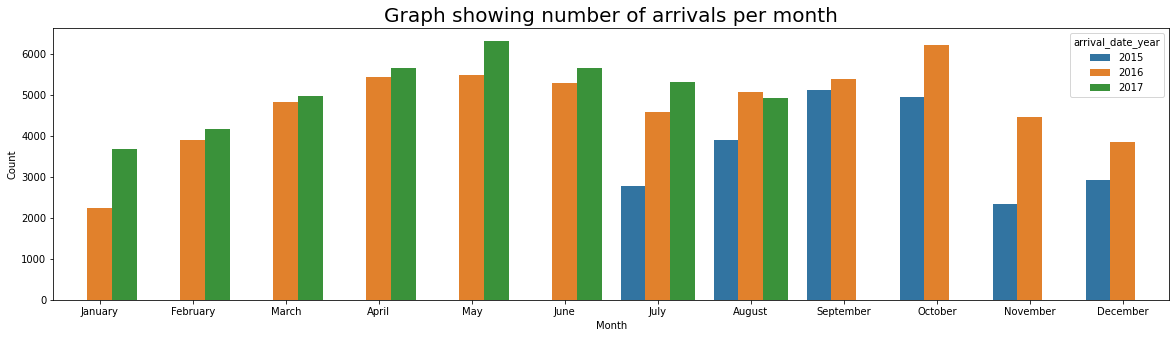

In [ ]:
#Graph arrival month
plt.figure(figsize=(20,5)) # adjust the size of the plot

sns.countplot(data = df, x = 'arrival_date_month', hue = 'arrival_date_year', order =new_order).set_title('Graph showing number of arrivals per month',fontsize=20)
plt.xlabel('Month') # Creating label for xaxis
plt.ylabel('Count') # Creating label for yaxis

Text(0, 0.5, 'Count')

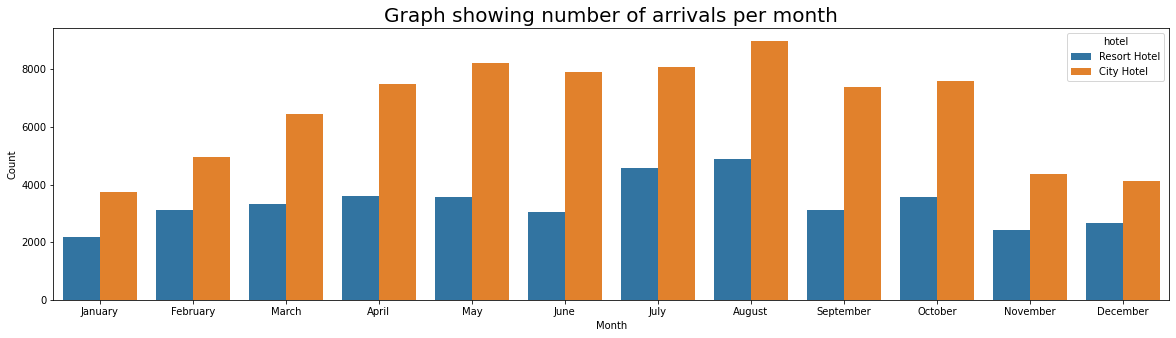

In [ ]:
#Graph arrival month
plt.figure(figsize=(20,5)) # adjust the size of the plot

sns.countplot(data = df2, x = 'arrival_date_month', hue = 'hotel', order =new_order).set_title('Graph showing number of arrivals per month',fontsize=20)
plt.xlabel('Month') # Creating label for xaxis
plt.ylabel('Count') # Creating label for yaxis

Text(0.5, 1.0, 'Graph showing number of arrivals per day')

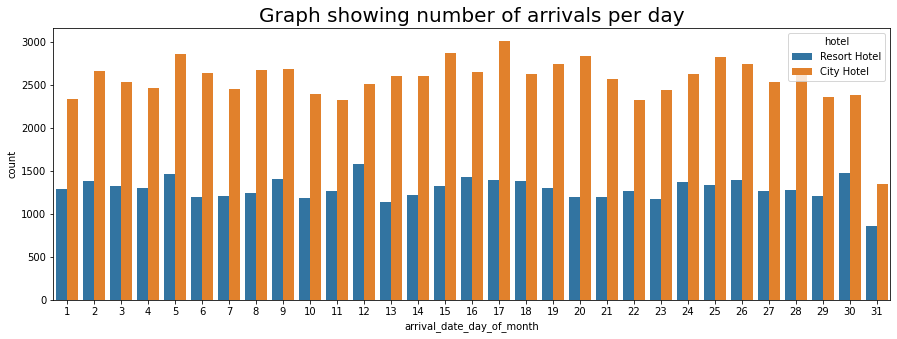

In [ ]:
#Graph arrival dates
plt.figure(figsize=(15,5))

sns.countplot(data = df2, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Graph showing number of arrivals per day', fontsize = 20)



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


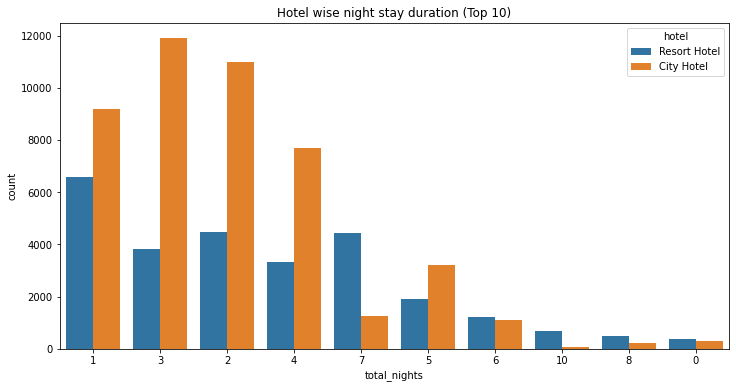

In [ ]:
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled, order = df_not_canceled.total_nights.value_counts(sort=True).iloc[:10].index, ax=ax)

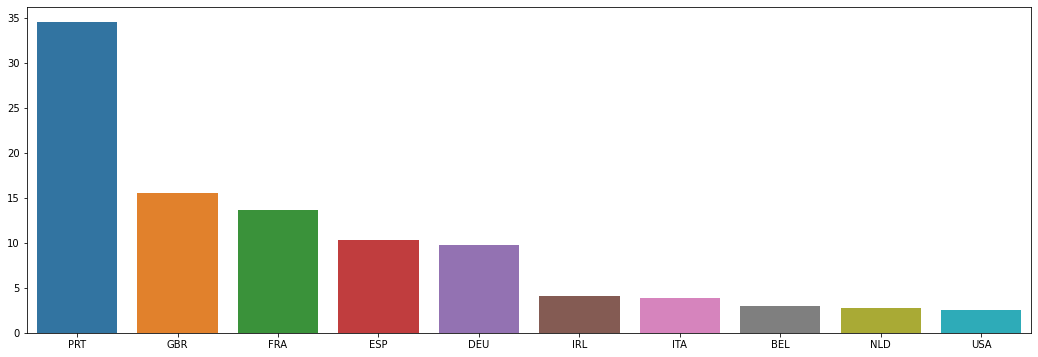

In [ ]:
Countries,percetage_bookings=get_percentage(df_not_canceled['country'], limit=10)
plt.subplots(figsize=(18,6))
sns.barplot(x=Countries,y=percetage_bookings)

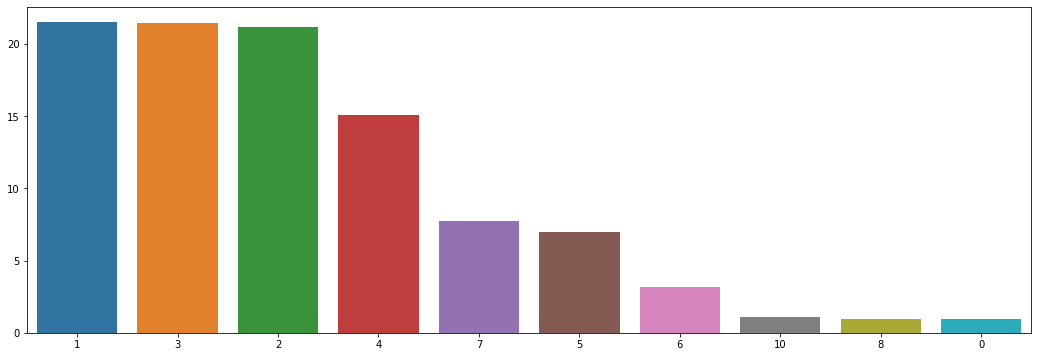

In [ ]:
total_nights= df_not_canceled['stays_in_weekend_nights'] +  df_not_canceled['stays_in_week_nights']

#print(total_nights.value_counts(sort=True))
days_in_hotel ,percent_people = get_percentage(total_nights, limit=10)

plt.subplots(figsize=(18,6))
sns.barplot(x=days_in_hotel,y=percent_people, order=days_in_hotel)

In [ ]:
df_is_canceled[df_is_canceled.groupby('country').size().reset_index()]

ValueError: ignored

In [ ]:
#Graphing booking data by country of origin

country_visitors = df_is_canceled.groupby('country').size().reset_index(name = 'count')

# We will be using Plotly.express to plot a choropleth map. 
import plotly.express as px

px.choropleth(country_visitors,
                    locations = "country",
                    color= "count", 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title="Home country of visitors")

In [ ]:
#adr analysis
city_data = df2[df2["hotel"]=="City Hotel"]
resort_data = df2[df2["hotel"]=="Resort Hotel"]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



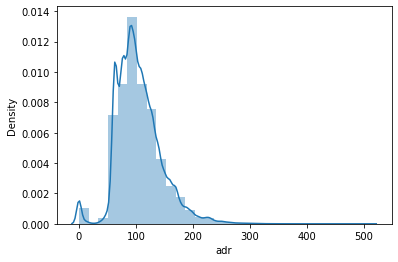

In [ ]:
sns.distplot(city_data[city_data["adr"]<=1000]["adr"],bins=30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



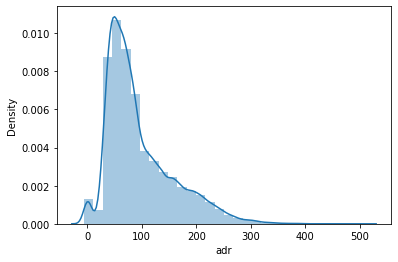

In [ ]:
sns.distplot(resort_data[resort_data["adr"]<=1000]["adr"],bins=30)
plt.show()

In [ ]:
#let's see monthly adr data
mon_city_adr = city_data.groupby("arrival_date_month")["adr"].describe()
mon_city_adr = mon_city_adr.reindex(new_order)
mon_city_adr



,count,mean,std,min,25%,50%,75%,max
arrival_date_month,,,,,,,,
January,3736.0,82.628986,25.350968,0.0,70.00,80.00,91.7025,284.20
February,4965.0,85.088278,28.781711,0.0,74.70,80.00,93.6000,284.20
March,6458.0,92.643116,72.889867,0.0,75.00,88.00,102.0000,5400.00
April,7480.0,111.251838,36.128762,0.0,90.00,105.00,127.5000,336.00
May,8232.0,121.638560,39.966153,0.0,97.02,120.00,140.4000,510.00
June,7894.0,119.074341,36.084648,0.0,96.30,117.37,135.0000,333.67
July,8088.0,110.734292,41.898966,0.0,82.00,107.10,134.3000,365.00
August,8983.0,114.680455,45.974009,0.0,81.00,109.00,140.0000,372.33
September,7400.0,110.004661,41.910098,0.0,80.00,107.00,135.9000,345.00


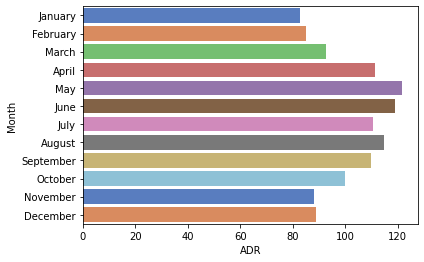

In [ ]:
ax1=sns.barplot(x=mon_city_adr["mean"],y=mon_city_adr.index,palette='muted')
ax1.set_xlabel("ADR")
ax1.set_ylabel("Month")
plt.show()

In [ ]:
mon_resort_adr = resort_data.groupby("arrival_date_month")["adr"].describe()
mon_resort_adr = mon_resort_adr.reindex(new_order)
mon_resort_adr

,count,mean,std,min,25%,50%,75%,max
arrival_date_month,,,,,,,,
January,2193.0,49.461883,19.711653,0.00,38.0000,47.600,58.0000,149.00
February,3103.0,55.171930,21.872480,0.00,40.0000,51.000,68.0000,174.00
March,3336.0,57.520147,24.331359,-6.38,40.0000,55.600,70.4000,193.71
April,3609.0,77.849496,32.007703,0.00,55.1000,75.000,90.0000,270.00
May,3559.0,78.758134,33.351698,0.00,55.1000,73.000,94.0000,225.50
June,3045.0,110.444749,44.408189,0.00,76.5000,105.000,138.0000,318.82
July,4573.0,155.181299,56.022916,0.00,116.5000,152.500,192.0000,508.00
August,4894.0,186.790574,59.450543,0.00,143.7975,188.420,225.6525,450.00
September,3108.0,93.252030,43.283535,0.00,65.0000,86.000,117.8025,307.50


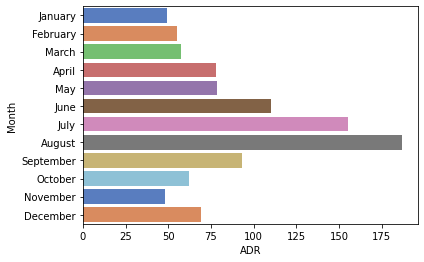

In [ ]:
ax1=sns.barplot(x=mon_resort_adr["mean"],y=mon_resort_adr.index,palette='muted')
ax1.set_xlabel("ADR")
ax1.set_ylabel("Month")
plt.show()

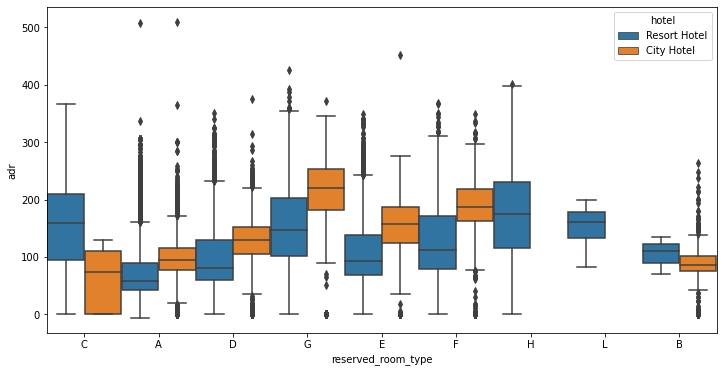

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'reserved_room_type', y = 'adr',data=df_not_canceled,hue='hotel',width =1)

In [ ]:
#revenue_analysis
df2["duration"]= df2['stays_in_weekend_nights']+df2['stays_in_week_nights']
df2["duration"]


0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: duration, Length: 119390, dtype: int64

In [ ]:
df2["revenue"] = df2["adr"]*df2["duration"]
city_data = df2[df2["hotel"]=="City Hotel"]
resort_data = df2[df2["hotel"]=="Resort Hotel"]

In [ ]:
city_data["revenue"].describe()

count    79330.000000
mean       318.662170
std        244.555445
min          0.000000
25%        160.000000
50%        264.000000
75%        401.200000
max       6148.000000
Name: revenue, dtype: float64

In [ ]:
city_data["revenue"].sum()

25279469.959999997

In [ ]:
mon_city_rev = city_data.groupby("arrival_date_month").sum()["revenue"]
mon_city_rev = mon_city_rev.reindex(new_order)
mon_city_rev

arrival_date_month
January       955659.46
February     1290179.65
March        1826875.23
April        2577342.25
May          2892122.22
June         2770764.43
July         2846445.30
August       3291650.58
September    2343765.62
October      2121356.75
November     1168201.39
December     1195107.08
Name: revenue, dtype: float64

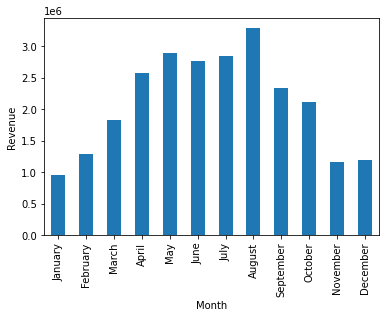

In [ ]:
ax3= mon_city_rev.plot.bar()
ax3.set_xlabel("Month")
ax3.set_ylabel("Revenue")
plt.show()



In [ ]:
city_roi = city_data.groupby("distribution_channel").sum()["revenue"]
city_roi

distribution_channel
Corporate      602745.13
Direct        2174185.14
GDS             45997.42
TA/TO        22455934.77
Undefined         607.50
Name: revenue, dtype: float64

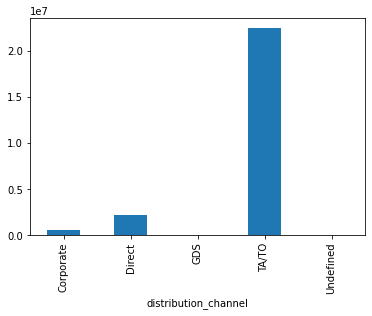

In [ ]:
city_roi.plot.bar()
plt.show()

In [ ]:
mon_resort_rev = resort_data.groupby("arrival_date_month").sum()["revenue"]
mon_resort_rev = mon_resort_rev.reindex(new_order)
mon_resort_rev

arrival_date_month
January       317417.97
February      528793.05
March         812345.86
April        1133123.89
May          1216003.68
June         1728622.85
July         3741268.34
August       4653066.85
September    1388151.56
October       888192.75
November      431955.15
December      605085.62
Name: revenue, dtype: float64

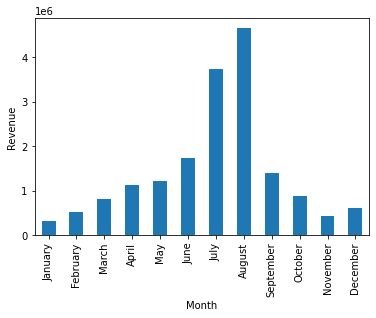

In [ ]:
ax4= mon_resort_rev.plot.bar()
ax4.set_xlabel("Month")
ax4.set_ylabel("Revenue")
plt.show()


In [ ]:
resort_roi = resort_data.groupby("distribution_channel").sum()["revenue"]
resort_roi

distribution_channel
Corporate      511348.33
Direct        3291915.66
TA/TO        13640200.08
Undefined         563.50
Name: revenue, dtype: float64

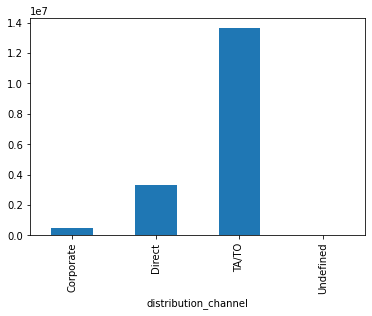

In [ ]:
resort_roi.plot.bar()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



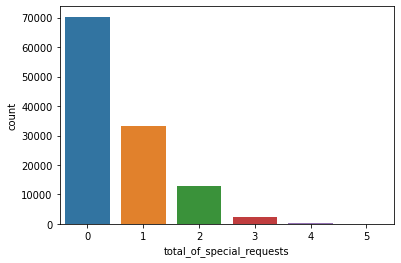

In [ ]:
sns.countplot(df2["total_of_special_requests"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



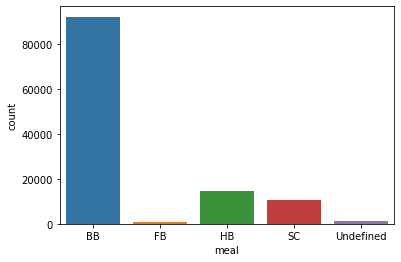

In [ ]:
sns.countplot(df2["meal"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



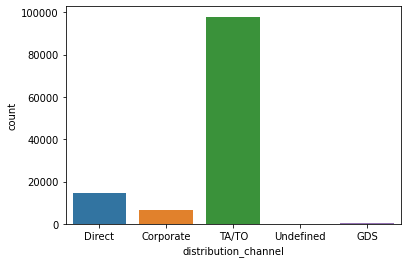

In [ ]:
#Most popular booking channel 
#Travel agents and tour operators are bring in most of the visitors 
sns.countplot(df2["distribution_channel"])
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



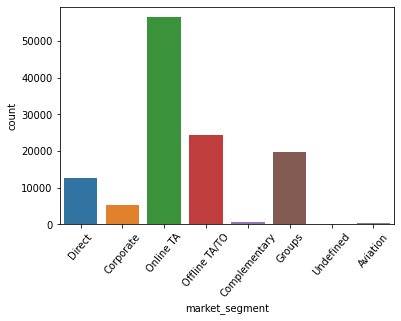

In [ ]:
#Most popular market segment 
#travel agents are most represented among our visitors as well 
sns.countplot(df2["market_segment"])
plt.xticks(rotation=50)
plt.show()



Text(0.5, 1.0, 'Graph showing type of guest')

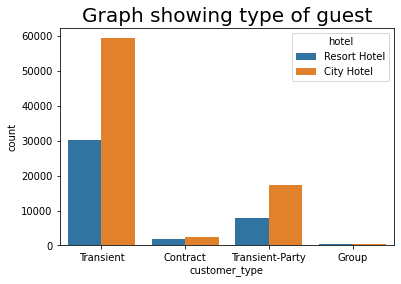

In [ ]:
#graph types of guests
sns.countplot(data = df, x = 'customer_type',hue='hotel').set_title('Graph showing type of guest', fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



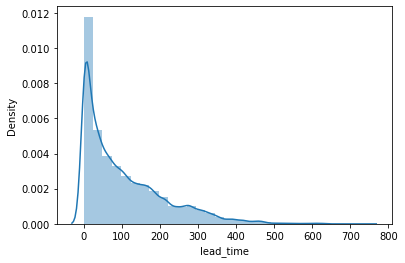

In [ ]:
#lead time for booking 
sns.distplot(df2['lead_time'],bins=30)
plt.show()

In [ ]:
monthly_cancellation = df2.groupby("arrival_date_month")["is_canceled"].sum()
monthly_cancellation = monthly_cancellation.reindex(new_order)
monthly_cancellation

arrival_date_month
January      1807
February     2696
March        3149
April        4524
May          4677
June         4535
July         4742
August       5239
September    4116
October      4246
November     2122
December     2371
Name: is_canceled, dtype: int64

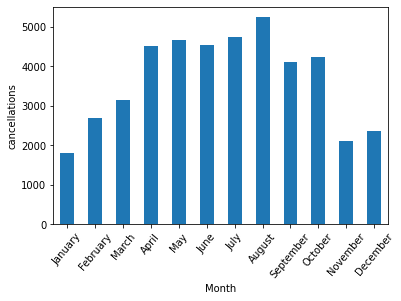

In [ ]:
ax6 = monthly_cancellation.plot.bar(rot=50)
ax6.set_xlabel("Month")
ax6.set_ylabel("cancellations")
plt.show()

Text(0.5, 1.0, 'Graph showing types of deposits')

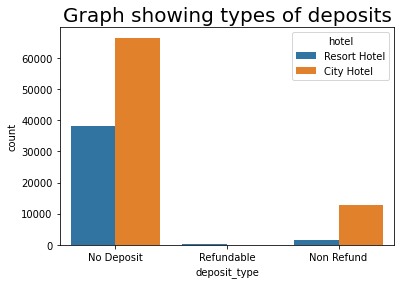

In [ ]:
#graphing deposit types
sns.countplot(data = df2, x = 'deposit_type', hue='hotel').set_title('Graph showing types of deposits', fontsize = 20)

In [ ]:
df2['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)